# Loss Curves for Neural Networks
**Objectives**
- Analyze and interpret training and testing loss curves for tabular data.
- Identify common training issues such as overfitting, underfitting, and instability.
- Experiment with model hyperparameters and training parameters to improve performance.


---

The **UCI Adult Income dataset** is a tabular dataset used for binary classification tasks. The goal is to predict whether an individual's income exceeds $50,000 per year based on census data.

**Details**:
- **Features:** 14 attributes (e.g., age, education, occupation).
- **Target:** Binary class (income >50K or <=50K).
- **Size:** 32,561

**Main Tasks**:
1. Load and preprocess the dataset.
2. Split it into a training and test set.
3. Train a neural network and analyze the training/test loss curves.
4. Perform experiments to understand how model capacity and learning rate impact performance.


----

## Part 1: Data Preparation

Objectives:
1. Load the dataset using `pandas`.
2. Split the data into a training and test set (say, 90%/10%)
3. Prepare data for training and inference by adequately handling missing values, categorical features, and normalizing the data.



In [84]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

df = pd.read_csv(url, names=columns, sep=',\s*', engine='python', na_values="NA")

In [85]:
import numpy as np
def analyze_df(df, target_col=None):
    print(f"Data shape: {df.shape}\n")
    print("df.info():\n")
    print(df.info())
    print("\ndf.head():\n")
    print(df.head())
    print("\ndf.describe():\n")
    print(df.describe())
    print("\ndf.describe(include=['category', 'object']):\n")
    print(df.describe(include=['category', 'object']))
    print("\nCorrelation matrix:\n")
    print(df.corr(numeric_only=True))
    missing_values = df.isnull().sum()
    print("\nMissing values per column:\n")
    print(missing_values)
    print("\nPercentage of missing values per column:\n")
    print(missing_values / len(df) * 100)
    print("\nUnique values per column:\n")
    print(df.nunique())
    print("\nValue counts for categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}:\n{df[col].value_counts()}\n")
    print("Mode of categorical columns:\n")
    print(df.select_dtypes(include=['category', 'object']).mode())
    print("\nMost frequent category in categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}: {df[col].mode().values[0]}, count: {df[col].value_counts().values[0]}")
    print("\nLeast frequent category in categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}: {df[col].value_counts().idxmin()}, count: {df[col].value_counts().values[-1]}")
    print("\nRange of numerical columns:\n")
    for col in df.select_dtypes(include=np.number).columns:
        print(f"{col}: {df[col].min()} - {df[col].max()}")
    print("\nSkewness of numerical columns:\n")
    print(df.select_dtypes(include=np.number).skew())
    print("\nKurtosis of numerical columns:\n")
    print(df.select_dtypes(include=np.number).kurt())
    print("\nOutliers in numerical columns:\n")
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f"{col}: {((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()} outliers")
    print("\nDuplicated rows:\n")
    print(df.duplicated().sum())
    if target_col:
        print(f"\nDistribution of target variable ({target_col}):\n")
        print(df[target_col].value_counts())

analyze_df(df, target_col="income")

Data shape: (32561, 15)

df.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

df.head():

   age         workclass  fnlwgt  educ

In [86]:
pd.set_option('display.max_columns', 120)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
######## Data Preparation ########
# rename ? labels to Unknown in columns: workclass, occupation, native-country
df.replace('?', 'Unknown', inplace=True)

# drop fnlwgt
df.drop(columns=['fnlwgt'], inplace=True)

# onehot encode categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.to_list()
df = pd.get_dummies(df, columns=categorical_features, dtype=int, drop_first=True)

######## Data Split ########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['income_>50K']), 
                                                    df['income_>50K'], 
                                                    test_size=0.1, 
                                                    random_state=42)

######## Data Normalization ########
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

######## Deeplearning Preparations ########
# Convert to Tensor
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Available device: {device}")
print("CUDA device name:", torch.cuda.get_device_name(torch.cuda.current_device()))

X_train = torch.from_numpy(X_train.values).type(torch.FloatTensor).to(device)
X_test = torch.from_numpy(X_test.values).type(torch.FloatTensor).to(device)
y_train = torch.from_numpy(y_train.values).type(torch.FloatTensor).to(device).reshape([-1, 1])
y_test = torch.from_numpy(y_test.values).type(torch.FloatTensor).to(device).reshape([-1, 1])

# Create training and test sets
training_set = list(zip(X_train, y_train))
test_set = list(zip(X_test, y_test))

Available device: cuda
CUDA device name: NVIDIA GeForce RTX 2070 SUPER


---

## Part 2: Build and Train the Model

**Initial Model Architecture**:


- *Input layer:* Size matches the number of features after encoding.
- *Hidden layers:*
  - Hidden Layer 1: 8 units, ReLU activation.
  - Hidden Layer 2: 8 units, ReLU activation.
- *Output layer:* 1 unit (binary classification), Sigmoid activation.


**Loss Function and Optimizer**:
- Loss: Binary Cross-Entropy Loss (`BCELoss`).
- Optimizer: SGD with a learning rate of 0.001.

**Training**:
- Train the model for 20 epochs.
- Record (store) the training and test losses at each epoch.


In [88]:
len(training_set[0][0])

99

In [89]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(x)
        return x
        

In [138]:
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings 
warnings.filterwarnings('ignore')

class ModelTrainer:
    def __init__(self, input_size, device, batch_size=16, learning_rate=0.001, verbose=True):
        self.input_size = input_size
        self.device = device
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.verbose = verbose  # control print statements
        
        # initialize model, loss function
        self.model = Net(input_size).to(device)
        self.loss_function = torch.nn.BCELoss()
        self.optimizer = SGD(self.model.parameters(), lr=learning_rate)
        
        # initialize storage for losses
        self.train_losses = []
        self.test_losses = []
        self.current_epoch = 0

    def set_learning_rate(self, new_lr):
        """Update the learning rate of the optimizer"""
        self.learning_rate = new_lr
        for param_group in self.optimizer.param_groups:
            param_group['lr'] = new_lr
        
    def setup_data_loaders(self, training_set, test_set):
        self.train_dataloader = DataLoader(training_set,
                                         batch_size=self.batch_size,
                                         shuffle=True)
        self.test_dataloader = DataLoader(test_set,
                                        batch_size=len(test_set),
                                        shuffle=False)
    
    def train_epoch(self, epoch):
        self.model.train()
        batch_losses = []
        
        # calculate field widths based on total values
        total_samples = len(self.train_dataloader.dataset)
        epoch_width = len(str(self.current_epoch + 1))
        sample_width = len(str(total_samples))
        
        for batch_idx, (data, target) in enumerate(self.train_dataloader):
            data, target = data.to(self.device), target.to(self.device)
            self.optimizer.zero_grad()
            output = self.model(data)
            loss = self.loss_function(output, target)
            loss.backward()
            self.optimizer.step()
            
            batch_losses.append(loss.item())
            if self.verbose and batch_idx % 10 == 0:
                samples_processed = batch_idx * len(data)
                percentage = 100. * batch_idx / len(self.train_dataloader)
                print(f'train epoch: {epoch:{epoch_width}} '
                    f'[{samples_processed:>{sample_width}}/{total_samples} ({percentage:.0f}%)]\t'
                    f'loss: {loss.item():.6f}')
        
        epoch_average_loss = np.average(batch_losses)
        self.train_losses.append(epoch_average_loss)
        return epoch_average_loss
    
    def test(self, epoch):
        self.model.eval()
        with torch.no_grad():
            data, target = next(iter(self.test_dataloader))
            data, target = data.to(self.device), target.to(self.device)
            output = self.model(data)
            loss = self.loss_function(output, target)
            test_loss = loss.item()

            # calculate accuracy
            predicted = (output > 0.5).float()  # threshold at 0.5 for binary classification
            correct = (predicted == target).sum().item()
            total = target.size(0)
            
            self.test_losses.append(test_loss)
            if self.verbose:
                print(f'\ntest set: average loss: {test_loss:.4f}, accuracy: {correct}/{total} ({100. * correct / total:.0f}%)\n')
            else:
                print(f'[epoch {epoch}] test set: average loss: {test_loss:.4f}, accuracy: {correct}/{total} ({100. * correct / total:.0f}%)')
            return test_loss
    
    def train(self, training_set, test_set, num_epochs=5):
        # setup data loaders
        self.setup_data_loaders(training_set, test_set)

        start_epoch = self.current_epoch + 1
        end_epoch = start_epoch + num_epochs
        
        # training loop
        for epoch in range(start_epoch, end_epoch):
            train_loss = self.train_epoch(epoch)
            test_loss = self.test(epoch)
            self.current_epoch = epoch
        
        # plot results
        self.plot_losses()
        
        return self.model
    
    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        epochs = range(1, self.current_epoch + 1)
        plt.plot(epochs, self.train_losses, label='train loss')
        plt.plot(epochs, self.test_losses, label='test loss')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('training and test losses')
        plt.legend()

        # set y-axis to standard decimal notation
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.4f}'))
        
        # set x-axis to integer ticks
        plt.xticks(epochs)

        plt.grid(False)
        plt.show()

[epoch 1] test set: average loss: 0.6934, accuracy: 2406/3257 (74%)
[epoch 2] test set: average loss: 0.6933, accuracy: 2422/3257 (74%)
[epoch 3] test set: average loss: 0.6932, accuracy: 2432/3257 (75%)
[epoch 4] test set: average loss: 0.6932, accuracy: 2437/3257 (75%)
[epoch 5] test set: average loss: 0.6932, accuracy: 2442/3257 (75%)
[epoch 6] test set: average loss: 0.6932, accuracy: 2445/3257 (75%)
[epoch 7] test set: average loss: 0.6932, accuracy: 2448/3257 (75%)
[epoch 8] test set: average loss: 0.6932, accuracy: 2448/3257 (75%)
[epoch 9] test set: average loss: 0.6932, accuracy: 2449/3257 (75%)
[epoch 10] test set: average loss: 0.6932, accuracy: 2449/3257 (75%)
[epoch 11] test set: average loss: 0.6932, accuracy: 2450/3257 (75%)
[epoch 12] test set: average loss: 0.6932, accuracy: 2451/3257 (75%)
[epoch 13] test set: average loss: 0.6932, accuracy: 2449/3257 (75%)
[epoch 14] test set: average loss: 0.6932, accuracy: 2449/3257 (75%)
[epoch 15] test set: average loss: 0.6932, 

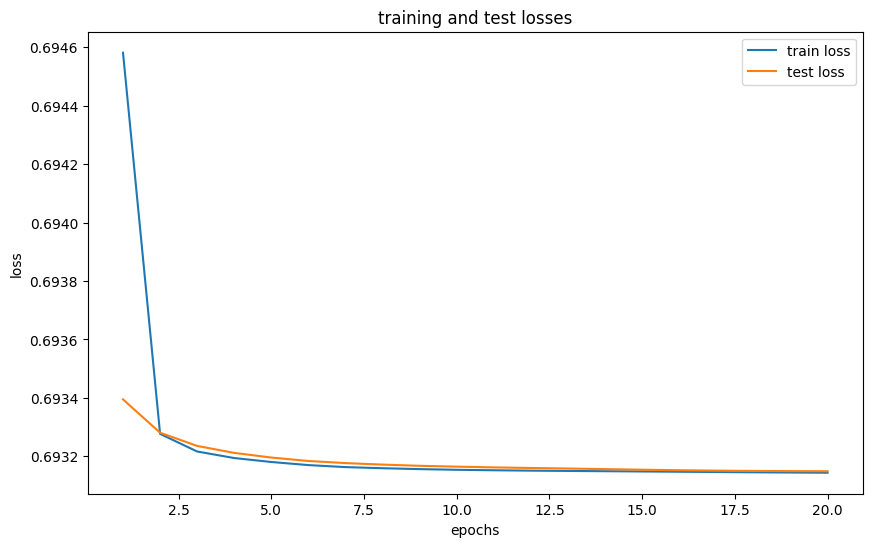

In [111]:
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
)

---

## Part 3: Visualize and Interpret Loss Curves

**Tasks**:
1. Plot the training and test loss curves.
2. Answer the following questions:
   - Is the model underfitting, overfitting, or neither? Provide evidence.
   - If overfitting occurs, at what epoch does it begin?
   - What can you infer about the model's performance from the loss curves?

**Answer:**
- Neither, the train and test loss curves are aligned and the test loss is decreasing while the train loss is increasing.
- The model isn't making much progress period.
   - The minuscule loss reduction indicates the model's learning is slow or insufficient, likely due to an issue like too small a learning rate or insufficient model complexity.


In [8]:
# your code here

---

## Part 4: Experimentation with Hyperparameters

**Experiment**: Varying model capacity
- Now train models with different hidden layer sizes (width & depth):
  - **Smaller model:** 
    - Try architectures will LESS representation capacity than we had initially
  - **Larger model:** 
    - Try architectures will MORE representation capacity than we had initially

- Train each of those architectures, with the same initial learning rate, 20 epochs each and plot their loss curves.

**Questions:**
1. How does changing the model size affect training and test loss?
2. What interesting findings have you found? Prepare to present and share with your classmates (just show the loss curves and explain your findings).


**Answer:**
- Reducing complexity didn't make it much worse, it was already as bad as it could be:
  - ln(0.5) = 0.6931, i.e. model isn't better than random guessing.



In [9]:
# your code here

In [153]:
# Smaller model

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
)
        

[epoch 1] test set: average loss: 0.5727, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.5441, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.5204, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.4906, accuracy: 2456/3257 (75%)
[epoch 5] test set: average loss: 0.4559, accuracy: 2456/3257 (75%)
[epoch 6] test set: average loss: 0.4226, accuracy: 2462/3257 (76%)
[epoch 7] test set: average loss: 0.3942, accuracy: 2546/3257 (78%)
[epoch 8] test set: average loss: 0.3714, accuracy: 2713/3257 (83%)
[epoch 9] test set: average loss: 0.3556, accuracy: 2748/3257 (84%)
[epoch 10] test set: average loss: 0.3455, accuracy: 2753/3257 (85%)
[epoch 11] test set: average loss: 0.3393, accuracy: 2757/3257 (85%)
[epoch 12] test set: average loss: 0.3353, accuracy: 2763/3257 (85%)
[epoch 13] test set: average loss: 0.3326, accuracy: 2767/3257 (85%)
[epoch 14] test set: average loss: 0.3303, accuracy: 2770/3257 (85%)
[epoch 15] test set: average loss: 0.3287, 

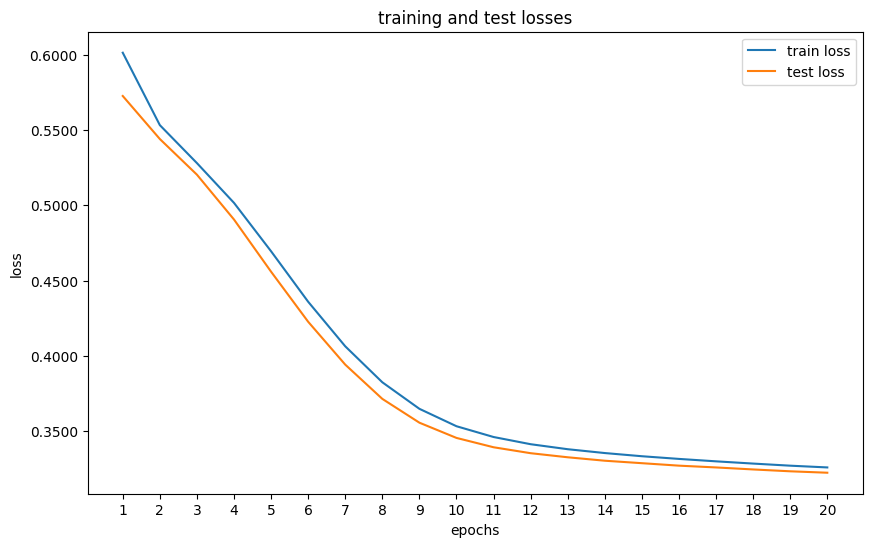

In [161]:
# Increase width from 8 to 32 and depth from 2 to 3

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)  # 8 -> 32
        self.fc2 = nn.Linear(32, 32)          # 8 -> 32
        self.fc3 = nn.Linear(32, 1)           # 8 -> 32 in first parameter
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
)

[epoch 1] test set: average loss: 0.5613, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.4967, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.4505, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.4172, accuracy: 2457/3257 (75%)
[epoch 5] test set: average loss: 0.3932, accuracy: 2520/3257 (77%)
[epoch 6] test set: average loss: 0.3748, accuracy: 2703/3257 (83%)
[epoch 7] test set: average loss: 0.3607, accuracy: 2750/3257 (84%)
[epoch 8] test set: average loss: 0.3503, accuracy: 2754/3257 (85%)
[epoch 9] test set: average loss: 0.3432, accuracy: 2758/3257 (85%)
[epoch 10] test set: average loss: 0.3384, accuracy: 2764/3257 (85%)
[epoch 11] test set: average loss: 0.3350, accuracy: 2767/3257 (85%)
[epoch 12] test set: average loss: 0.3324, accuracy: 2774/3257 (85%)
[epoch 13] test set: average loss: 0.3303, accuracy: 2771/3257 (85%)
[epoch 14] test set: average loss: 0.3284, accuracy: 2773/3257 (85%)
[epoch 15] test set: average loss: 0.3268, 

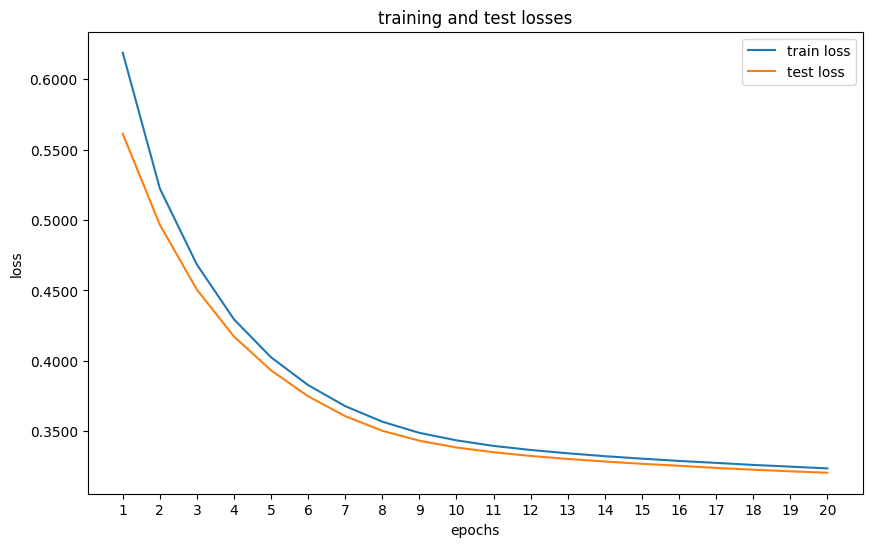

In [162]:
# Simple Pyramid structure, gradually decrease width

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
) 

[epoch 1] test set: average loss: 0.5843, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.5448, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.5183, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.4733, accuracy: 2456/3257 (75%)
[epoch 5] test set: average loss: 0.4203, accuracy: 2456/3257 (75%)
[epoch 6] test set: average loss: 0.3828, accuracy: 2527/3257 (78%)
[epoch 7] test set: average loss: 0.3600, accuracy: 2749/3257 (84%)
[epoch 8] test set: average loss: 0.3459, accuracy: 2760/3257 (85%)
[epoch 9] test set: average loss: 0.3364, accuracy: 2772/3257 (85%)
[epoch 10] test set: average loss: 0.3309, accuracy: 2779/3257 (85%)
[epoch 11] test set: average loss: 0.3267, accuracy: 2779/3257 (85%)
[epoch 12] test set: average loss: 0.3241, accuracy: 2773/3257 (85%)
[epoch 13] test set: average loss: 0.3217, accuracy: 2782/3257 (85%)
[epoch 14] test set: average loss: 0.3194, accuracy: 2784/3257 (85%)
[epoch 15] test set: average loss: 0.3175, 

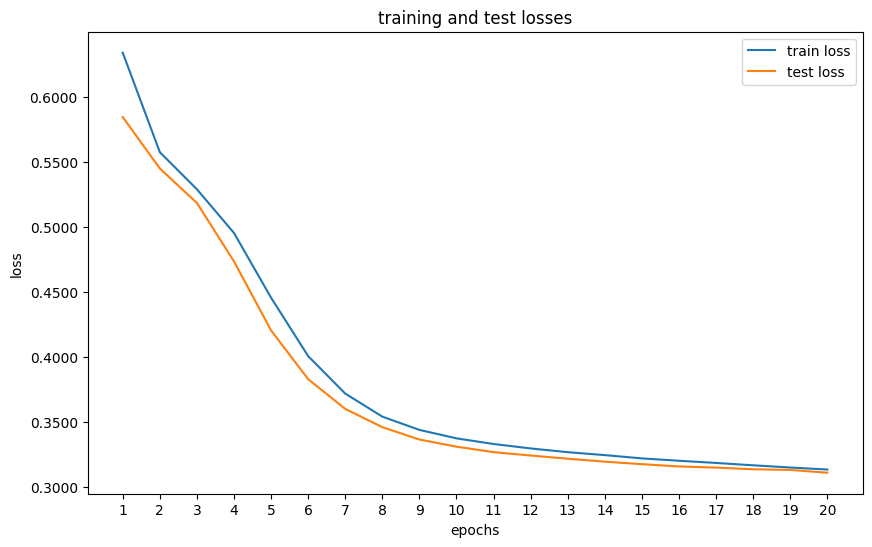

In [163]:
# Large pyramid structure

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 1024)  # More neurons
        self.fc2 = nn.Linear(1024, 512)          # More neurons
        self.fc3 = nn.Linear(512, 256)           # More neurons
        self.fc4 = nn.Linear(256, 128)           # More neurons
        self.fc5 = nn.Linear(128, 1)             # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        return x
    

# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
)

[epoch 1] test set: average loss: 0.4495, accuracy: 2650/3257 (81%)
[epoch 2] test set: average loss: 0.3846, accuracy: 2738/3257 (84%)
[epoch 3] test set: average loss: 0.3757, accuracy: 2737/3257 (84%)
[epoch 4] test set: average loss: 0.3549, accuracy: 2755/3257 (85%)
[epoch 5] test set: average loss: 0.3527, accuracy: 2751/3257 (84%)
[epoch 6] test set: average loss: 0.3594, accuracy: 2730/3257 (84%)
[epoch 7] test set: average loss: 0.3467, accuracy: 2753/3257 (85%)
[epoch 8] test set: average loss: 0.3405, accuracy: 2754/3257 (85%)
[epoch 9] test set: average loss: 0.3437, accuracy: 2756/3257 (85%)
[epoch 10] test set: average loss: 0.3492, accuracy: 2762/3257 (85%)
[epoch 11] test set: average loss: 0.3461, accuracy: 2747/3257 (84%)
[epoch 12] test set: average loss: 0.3494, accuracy: 2729/3257 (84%)
[epoch 13] test set: average loss: 0.3575, accuracy: 2716/3257 (83%)
[epoch 14] test set: average loss: 0.3517, accuracy: 2744/3257 (84%)
[epoch 15] test set: average loss: 0.3445, 

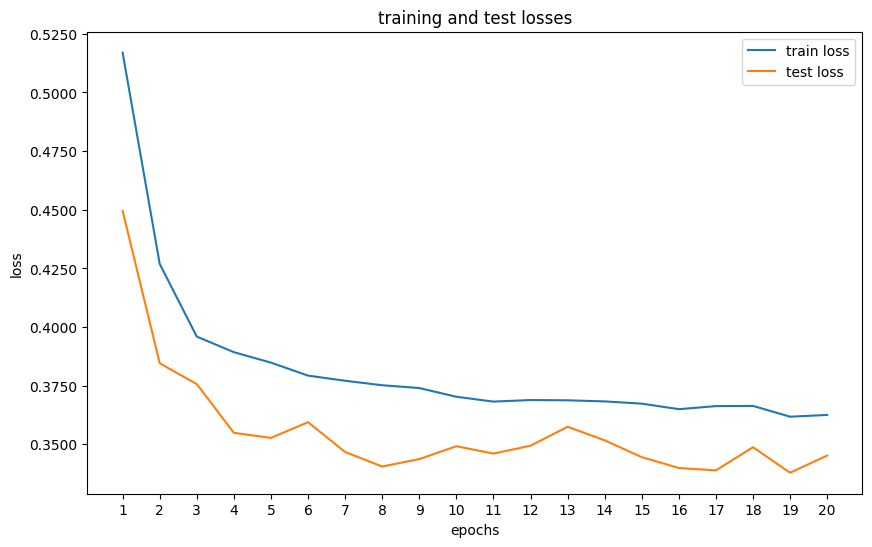

In [164]:
# Advanced model with dropout and batch normalization

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)             # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc4(self.fc3(x)))
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
) 

[epoch 1] test set: average loss: 0.6012, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.5679, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.5583, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.5553, accuracy: 2456/3257 (75%)
[epoch 5] test set: average loss: 0.5533, accuracy: 2456/3257 (75%)
[epoch 6] test set: average loss: 0.5504, accuracy: 2456/3257 (75%)
[epoch 7] test set: average loss: 0.5454, accuracy: 2456/3257 (75%)
[epoch 8] test set: average loss: 0.5360, accuracy: 2456/3257 (75%)
[epoch 9] test set: average loss: 0.5164, accuracy: 2456/3257 (75%)
[epoch 10] test set: average loss: 0.4795, accuracy: 2456/3257 (75%)
[epoch 11] test set: average loss: 0.4311, accuracy: 2456/3257 (75%)
[epoch 12] test set: average loss: 0.3973, accuracy: 2456/3257 (75%)
[epoch 13] test set: average loss: 0.3806, accuracy: 2456/3257 (75%)
[epoch 14] test set: average loss: 0.3704, accuracy: 2456/3257 (75%)
[epoch 15] test set: average loss: 0.3626, 

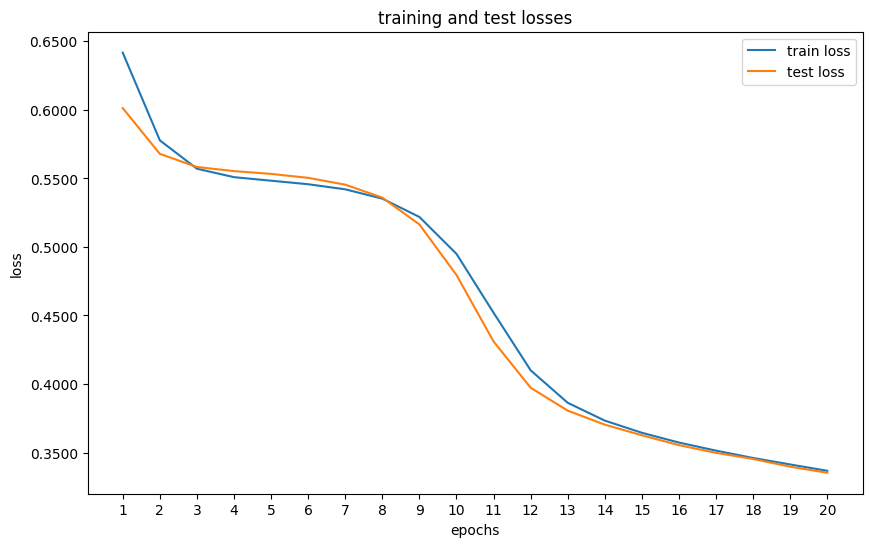

In [166]:
# Very large pyramid structure

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 2048)  # Significantly more neurons
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 64)
        self.fc7 = nn.Linear(64, 1)             # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.sigmoid(self.fc7(x))
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=20
) 

[epoch 1] test set: average loss: 0.6073, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.5717, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.5608, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.5574, accuracy: 2456/3257 (75%)
[epoch 5] test set: average loss: 0.5562, accuracy: 2456/3257 (75%)
[epoch 6] test set: average loss: 0.5554, accuracy: 2456/3257 (75%)
[epoch 7] test set: average loss: 0.5543, accuracy: 2456/3257 (75%)
[epoch 8] test set: average loss: 0.5528, accuracy: 2456/3257 (75%)
[epoch 9] test set: average loss: 0.5505, accuracy: 2456/3257 (75%)
[epoch 10] test set: average loss: 0.5464, accuracy: 2456/3257 (75%)
[epoch 11] test set: average loss: 0.5386, accuracy: 2456/3257 (75%)
[epoch 12] test set: average loss: 0.5226, accuracy: 2456/3257 (75%)
[epoch 13] test set: average loss: 0.4906, accuracy: 2456/3257 (75%)
[epoch 14] test set: average loss: 0.4406, accuracy: 2456/3257 (75%)
[epoch 15] test set: average loss: 0.4012, 

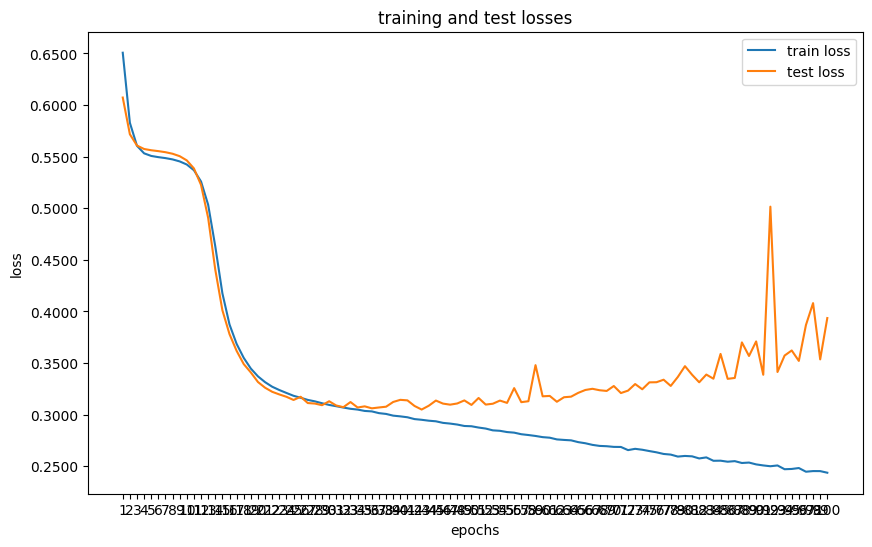

In [167]:
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=100
) 

[epoch 1] test set: average loss: 0.6139, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.5770, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.5639, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.5596, accuracy: 2456/3257 (75%)
[epoch 5] test set: average loss: 0.5582, accuracy: 2456/3257 (75%)
[epoch 6] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 7] test set: average loss: 0.5578, accuracy: 2456/3257 (75%)
[epoch 8] test set: average loss: 0.5578, accuracy: 2456/3257 (75%)
[epoch 9] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 10] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 11] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 12] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 13] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 14] test set: average loss: 0.5579, accuracy: 2456/3257 (75%)
[epoch 15] test set: average loss: 0.5579, 

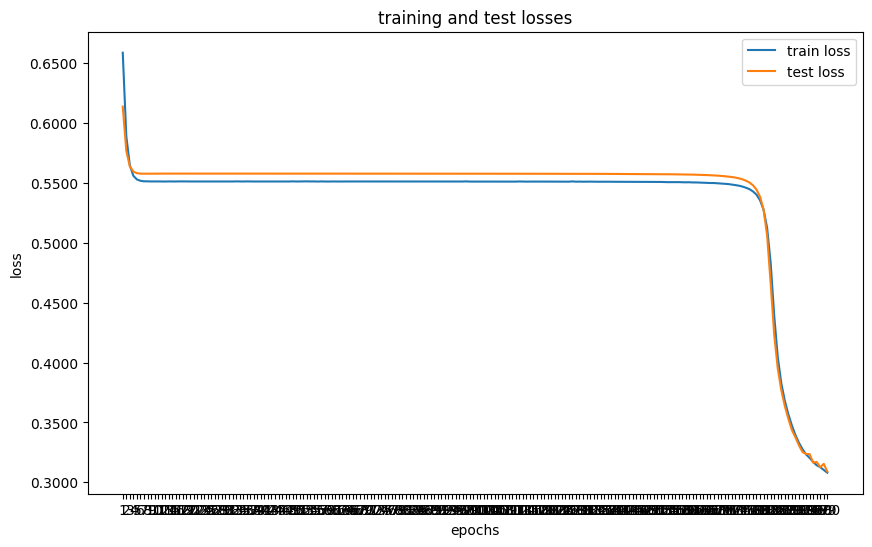

In [168]:
class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 4096)  # Very high number of neurons
        self.fc2 = nn.Linear(4096, 2048)         # More neurons
        self.fc3 = nn.Linear(2048, 1024)         # More neurons
        self.fc4 = nn.Linear(1024, 512)          # More neurons
        self.fc5 = nn.Linear(512, 256)           # More neurons
        self.fc6 = nn.Linear(256, 128)           # More neurons
        self.fc7 = nn.Linear(128, 64)            # More neurons
        self.fc8 = nn.Linear(64, 32)              # More neurons
        self.fc9 = nn.Linear(32, 16)              # More neurons
        self.fc10 = nn.Linear(16, 1)              # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.sigmoid(self.fc10(x))  # Final output layer
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=200
) 

[epoch 1] test set: average loss: 0.6092, accuracy: 2456/3257 (75%)
[epoch 2] test set: average loss: 0.5549, accuracy: 2456/3257 (75%)
[epoch 3] test set: average loss: 0.5207, accuracy: 2456/3257 (75%)
[epoch 4] test set: average loss: 0.4876, accuracy: 2456/3257 (75%)
[epoch 5] test set: average loss: 0.4542, accuracy: 2456/3257 (75%)
[epoch 6] test set: average loss: 0.4246, accuracy: 2457/3257 (75%)
[epoch 7] test set: average loss: 0.4007, accuracy: 2462/3257 (76%)
[epoch 8] test set: average loss: 0.3821, accuracy: 2538/3257 (78%)
[epoch 9] test set: average loss: 0.3670, accuracy: 2683/3257 (82%)
[epoch 10] test set: average loss: 0.3550, accuracy: 2751/3257 (84%)
[epoch 11] test set: average loss: 0.3461, accuracy: 2747/3257 (84%)
[epoch 12] test set: average loss: 0.3398, accuracy: 2765/3257 (85%)
[epoch 13] test set: average loss: 0.3351, accuracy: 2772/3257 (85%)
[epoch 14] test set: average loss: 0.3318, accuracy: 2776/3257 (85%)
[epoch 15] test set: average loss: 0.3293, 

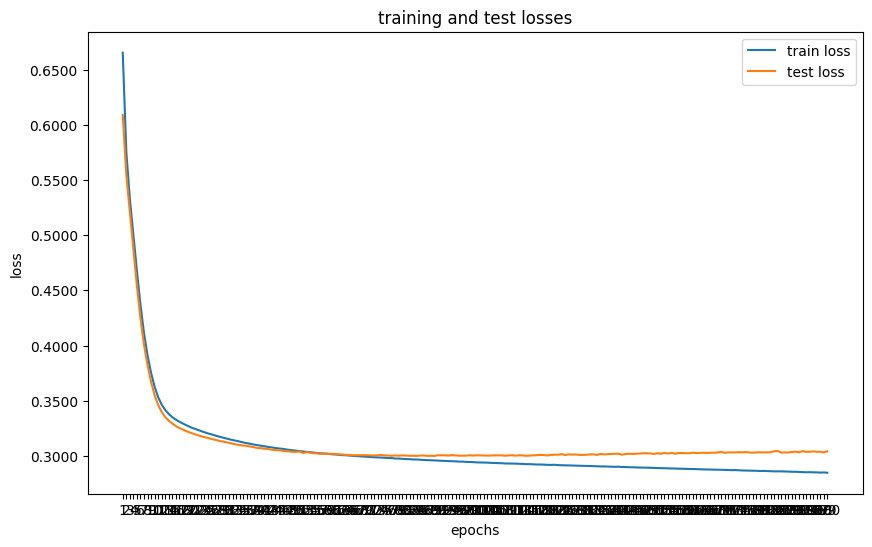

In [169]:
# Simple Pyramid structure, gradually decrease width

class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x
    
# initialize trainer
trainer = ModelTrainer(
    input_size=len(training_set[0][0]),
    device=device,
    batch_size=16,
    learning_rate=0.001,
    verbose=False
)

# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=200
) 

---
## Part 5: Experimentation with learning rate


**Experiment**: Periodic reduction of learning rate
- During class we learned that dropping the learning rate, after a period of training, could lead to better results. Can we try to replicate that?

**Question:**
1. Did you succeed? If so, why did it work?

**Answer:**
- Yes, but rather than reducing the learning rate, I increased it.
- This gave the expected result but for the opposite reason.


In [10]:
# your code here

In [114]:
trainer.set_learning_rate(0.01)

[epoch 51] test set: average loss: 0.6488, accuracy: 2806/3257 (86%)
[epoch 52] test set: average loss: 0.6486, accuracy: 2794/3257 (86%)
[epoch 53] test set: average loss: 0.6501, accuracy: 2783/3257 (85%)
[epoch 54] test set: average loss: 0.6483, accuracy: 2796/3257 (86%)
[epoch 55] test set: average loss: 0.6500, accuracy: 2786/3257 (86%)


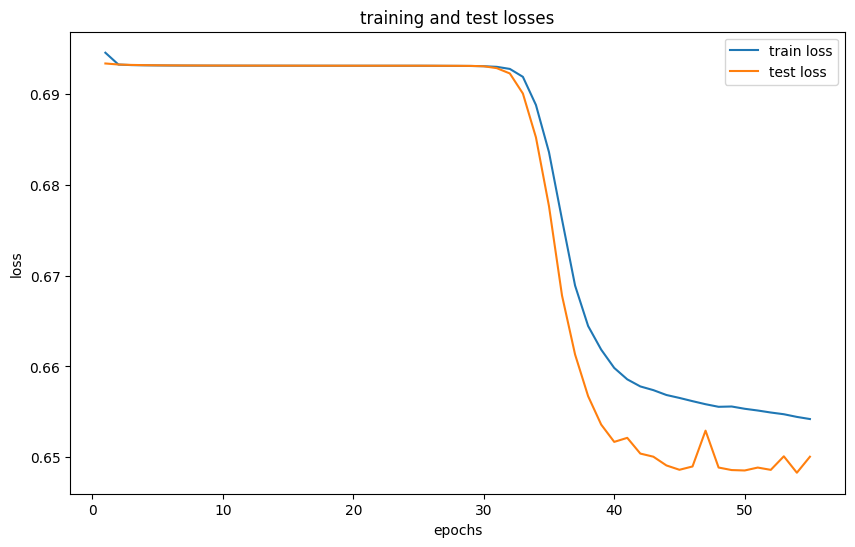

In [120]:
# train model
trained_model = trainer.train(
    training_set=training_set,
    test_set=test_set,
    num_epochs=5
)

In [ ]:
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


# Define Training and Testing Functions
def train(model, device, train_loader, optimizer, epoch, train_losses):
    model.train()
    batch_losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()                  # zero the gradients
        output = model(data)                   # forward pass
        loss = loss_function(output, target)   # calculate loss
        loss.backward()                        # backpropagation
        optimizer.step()                       # update weights
        
        batch_losses.append(loss.item())
        if batch_idx % 10 == 0:                # log every 10 batches
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
    epoch_average_loss = np.average(batch_losses)
    train_losses.append(epoch_average_loss)
    return epoch_average_loss


def test(model, device, test_loader, test_losses):
    model.eval()
    with torch.no_grad():
        # Single forward pass for entire test set
        data, target = next(iter(test_loader))
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = loss_function(output, target)
        test_loss = loss.item()
        
    test_losses.append(test_loss)
    print(f'\nTest set: Average loss: {test_loss:.4f}\n')
    return test_loss

#########################################################################

input_size = len(training_set[0][0]) # 99
batch_size = 16                      # default = 16
num_epochs = 5                      # default = 20
learning_rate = 0.001                # default = 0.001

# Initialize the Model, Optimizer, and DataLoader
model = Net(input_size).to(device)
optimizer = SGD(model.parameters(), lr = learning_rate)
loss_function = torch.nn.BCELoss()
train_dataloader = DataLoader(training_set,                 
                              batch_size = batch_size,       
                              shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle=False)

train_losses = []
test_losses = []

# Run Training and Testing Loops
for epoch in range(1, num_epochs + 1):
    train_loss = train(model, device, train_dataloader, optimizer, epoch, train_losses)
    test_loss = test(model, device, test_dataloader, test_losses)

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.grid(False)
plt.show()

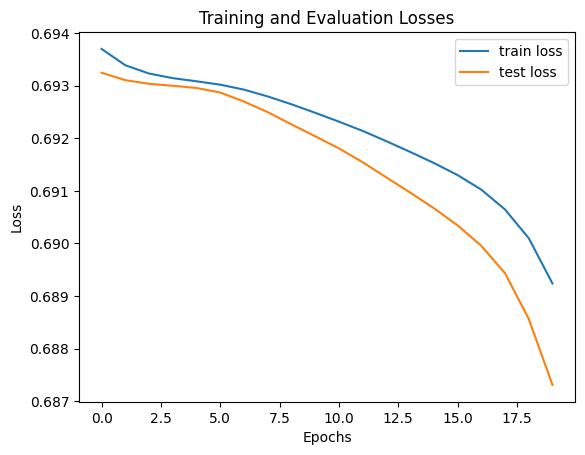

In [73]:
import torch.nn.functional as F

from torch.optim import SGD
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

input_size = len(training_set[0][0])  # 99
batch_size = 16

epochs = 20                     # default = 20
learning_rate = 0.001           # default = 0.001
 
# ----------------------------------------------------------------------------------------------------------------
#    initera modell, loss_function, optimizer & dataloader


model = Net(input_size)
model = model.to(device)

optimizer = SGD(model.parameters(), lr = learning_rate)
loss_function = torch.nn.BCELoss()
train_dataloader = DataLoader(training_set,                 
                              batch_size = batch_size,       
                              shuffle=True)


# ----------------------------------------------------------------------------------------------------------------
#    träna



batch_train_losses = []

epoch_train_losses = []
epoch_evaluation_losses = []

for i in range(epochs):
    
    model.train()

    running_loss = 0
    
    for batch in train_dataloader:
        y_true = batch[1]
        input_features = batch[0]

        y_pred=model(input_features)
        loss=loss_function(y_pred, y_true)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        batch_loss = loss.item()
        batch_train_losses.append(batch_loss)
    
    epoch_average_loss = np.average(batch_train_losses[-len(train_dataloader):])

    epoch_train_losses.append(epoch_average_loss)

# ----------------------------------------------------------------------------------------------------------------
#   evalueringssektion 

    model.eval()
    
    y_true = y_test
    input_features = X_test
    
    y_pred = model(input_features)
    loss = loss_function(y_pred, y_true)
    
    evaluation_loss = loss.item()
    epoch_evaluation_losses.append(evaluation_loss)

# ----------------------------------------------------------------------------------------------------------------
#   plotta resultat 

plt.plot(epoch_train_losses, label = 'train loss')
plt.plot(epoch_evaluation_losses, label = 'test loss')
plt.legend()

# axis labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Evaluation Losses')

plt.show()

In [ ]:
# train_epoch without modified print formatting
def train_epoch(self, epoch):
    self.model.train()
    batch_losses = []
    
    for batch_idx, (data, target) in enumerate(self.train_dataloader):
        data, target = data.to(self.device), target.to(self.device)
        self.optimizer.zero_grad()
        output = self.model(data)
        loss = self.loss_function(output, target)
        loss.backward()
        self.optimizer.step()
        
        batch_losses.append(loss.item())
        if self.verbose and batch_idx % 10 == 0:
            print(f'train epoch: {epoch} [{batch_idx * len(data)}/{len(self.train_dataloader.dataset)} '
                    f'({100. * batch_idx / len(self.train_dataloader):.0f}%)]\tloss: {loss.item():.6f}')
    
    epoch_average_loss = np.average(batch_losses)
    self.train_losses.append(epoch_average_loss)
    return epoch_average_loss